## Data Visualization

* Compare data sets through effective composition visualizations

* Create visual representations to show relationships between two features

* Demonstrate the visualization of the relationship between two features to identify correlations and trends

* Analyze data distribution through visualization techniques to understand its shape and spread

Install and import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the CSV File into a Pandas DataFrame

In [3]:
file_path = r'D:\New folder (4)\Coursera\DA Capstone\cleaned_survey_data3.csv'

dfo = pd.read_csv(file_path)

dfo.head()    # Display the first five rows

,Unnamed: 0,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,...,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceRange,Language,AgeNumeric
0,0,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,...,15.0,0.0,0.0,Appropriate in length,Easy,66616.0,8.0,5-10,JavaScript,40.0
1,1,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,...,15.0,0.0,0.0,Appropriate in length,Easy,66616.0,8.0,5-10,Python,40.0
2,2,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,...,15.0,0.0,0.0,Appropriate in length,Easy,66616.0,8.0,5-10,Ruby,40.0
3,3,13,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Sch...,...,20.0,10.0,10.0,Appropriate in length,Easy,66616.0,8.0,10-20,Bash/Shell (all shells),40.0
4,4,13,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Sch...,...,20.0,10.0,10.0,Appropriate in length,Easy,66616.0,8.0,10-20,C#,40.0


In [3]:
df = dfo.copy()

In [4]:
dfs = dfo.copy()

Create a SQLite Database and Insert the Data

In [5]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
dfs.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()

Verify the Data in the SQLite Database

In [6]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
dfs_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(dfs_check)


   Unnamed: 0  ResponseId                                         MainBranch  \
0           0          11  I used to be a developer by profession, but no...   
1           1          11  I used to be a developer by profession, but no...   
2           2          11  I used to be a developer by profession, but no...   
3           3          13                     I am a developer by profession   
4           4          13                     I am a developer by profession   

               Age           Employment                            RemoteWork  \
0  35-44 years old  Employed, full-time                                Remote   
1  35-44 years old  Employed, full-time                                Remote   
2  35-44 years old  Employed, full-time                                Remote   
3  35-44 years old  Employed, full-time  Hybrid (some remote, some in-person)   
4  35-44 years old  Employed, full-time  Hybrid (some remote, some in-person)   

    Check                       

Running an SQL Query

In [7]:
# Count the number of rows in the table named 'main'
QUERY = """
SELECT COUNT(*) 
FROM main
"""
dfs = pd.read_sql_query(QUERY, conn)
dfs.head()

,COUNT(*)
0,157077


Listing All Tables

In [8]:
# View the names of all tables in the database
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


Running a Group By Query

In [9]:
# Group data by a specific column, like Age, to get the count of respondents in each age group
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)

,Age,count
0,18-24 years old,26210
1,25-34 years old,66520
2,35-44 years old,41648
3,45-54 years old,16054
4,55-64 years old,5294
5,65 years or older,535
6,Prefer not to say,269
7,Under 18 years old,547


Describing a table

In [10]:
# get the schema of a specific table
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

dfs = pd.read_sql_query(QUERY, conn)
print(dfs.iat[0,0])

CREATE TABLE "main" (
"Unnamed: 0" INTEGER,
  "ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" REAL,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTe

##### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of `CompTotal` (Total Compensation).

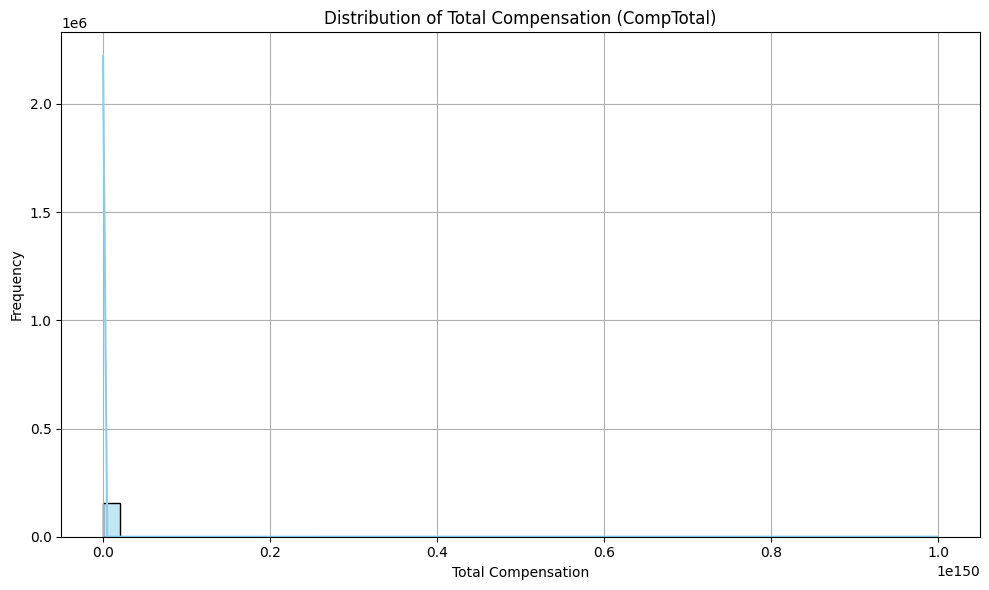

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CompTotal'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

**Box Plots**

Plot a box plot of `Age`.

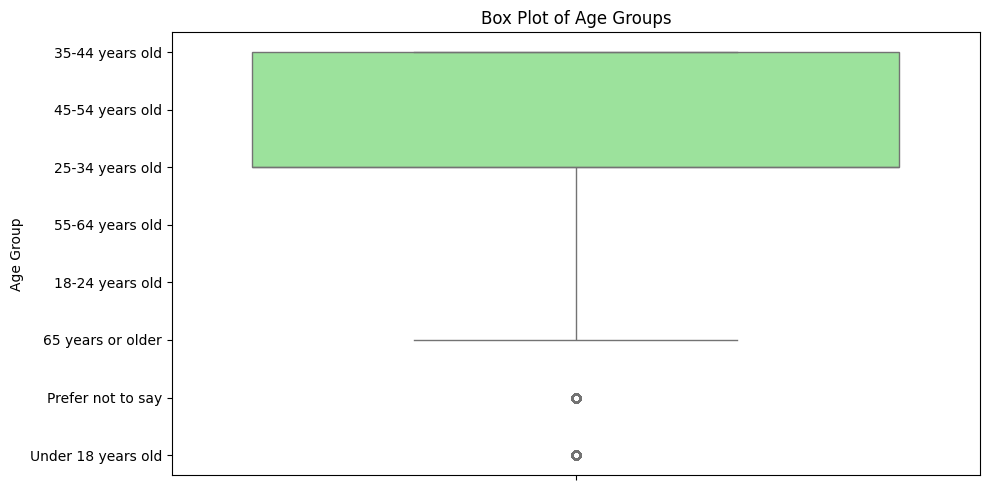

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(y='Age', data=df, color='lightgreen')
plt.title('Box Plot of Age Groups')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

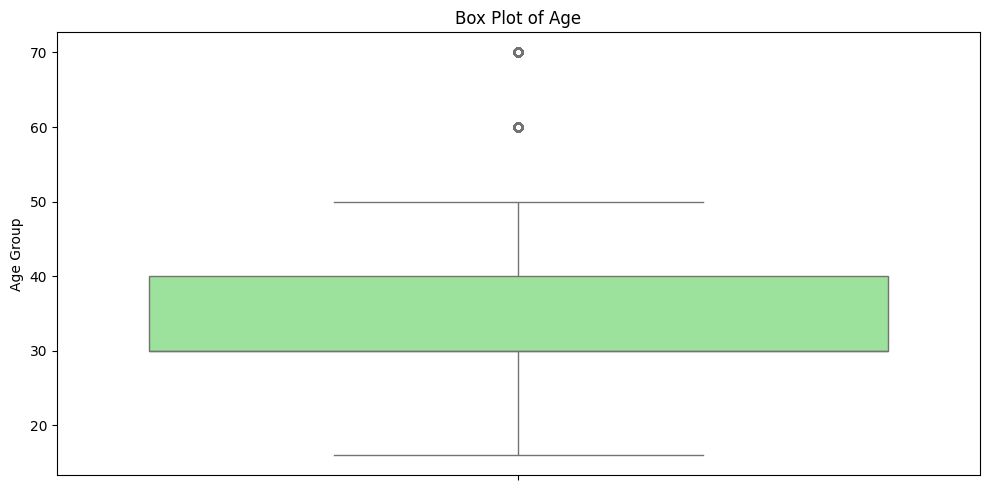

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(y='AgeNumeric', data=df, color='lightgreen')
plt.title('Box Plot of Age')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

##### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of `Age` and `WorkExp`.

In [14]:
# drop outliers

# Calculate Q1 and Q3
Q1 = df['AgeNumeric'].quantile(0.25)
Q3 = df['AgeNumeric'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame
dfc = df[(df['AgeNumeric'] >= lower_bound) & (df['AgeNumeric'] <= upper_bound)].copy()

# Optional: Check size difference
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {dfc.shape}")


Original shape: (157077, 116)
Cleaned shape: (150979, 116)


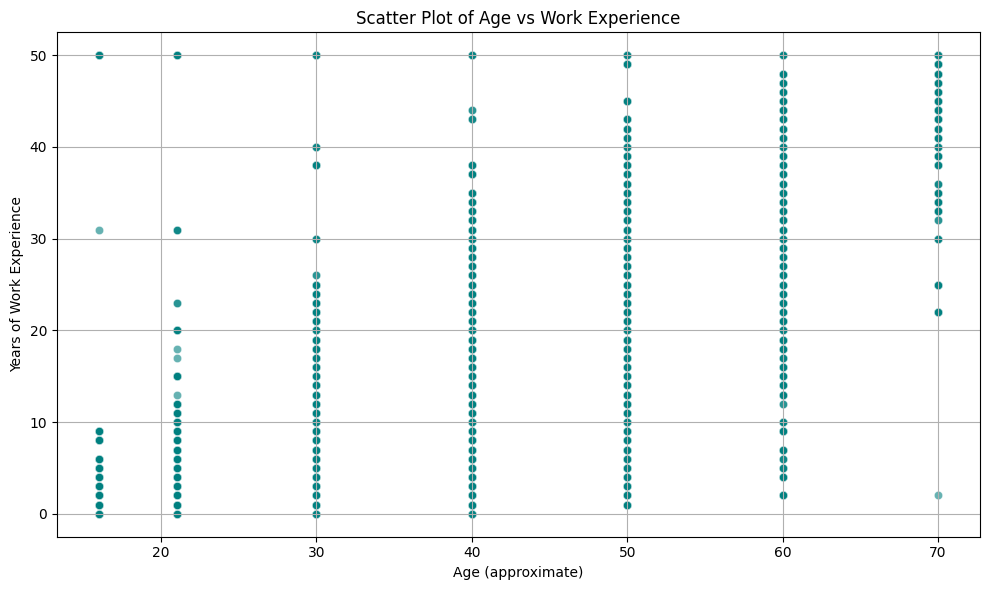

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AgeNumeric', y='WorkExp', alpha=0.6, color='teal')
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age (approximate)')
plt.ylabel('Years of Work Experience')
plt.grid(True)
plt.tight_layout()
plt.show()

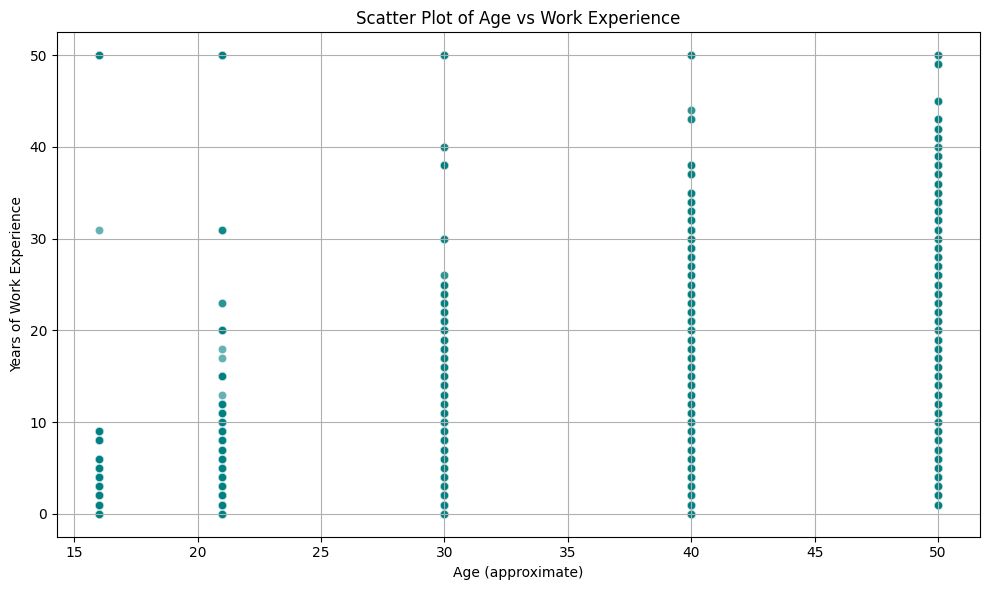

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfc, x='AgeNumeric', y='WorkExp', alpha=0.6, color='teal')
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age (approximate)')
plt.ylabel('Years of Work Experience')
plt.grid(True)
plt.tight_layout()
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the `Age` column as the bubble size.

In [17]:
df_bubble = df[['TimeSearching', 'Frustration', 'AgeNumeric']]

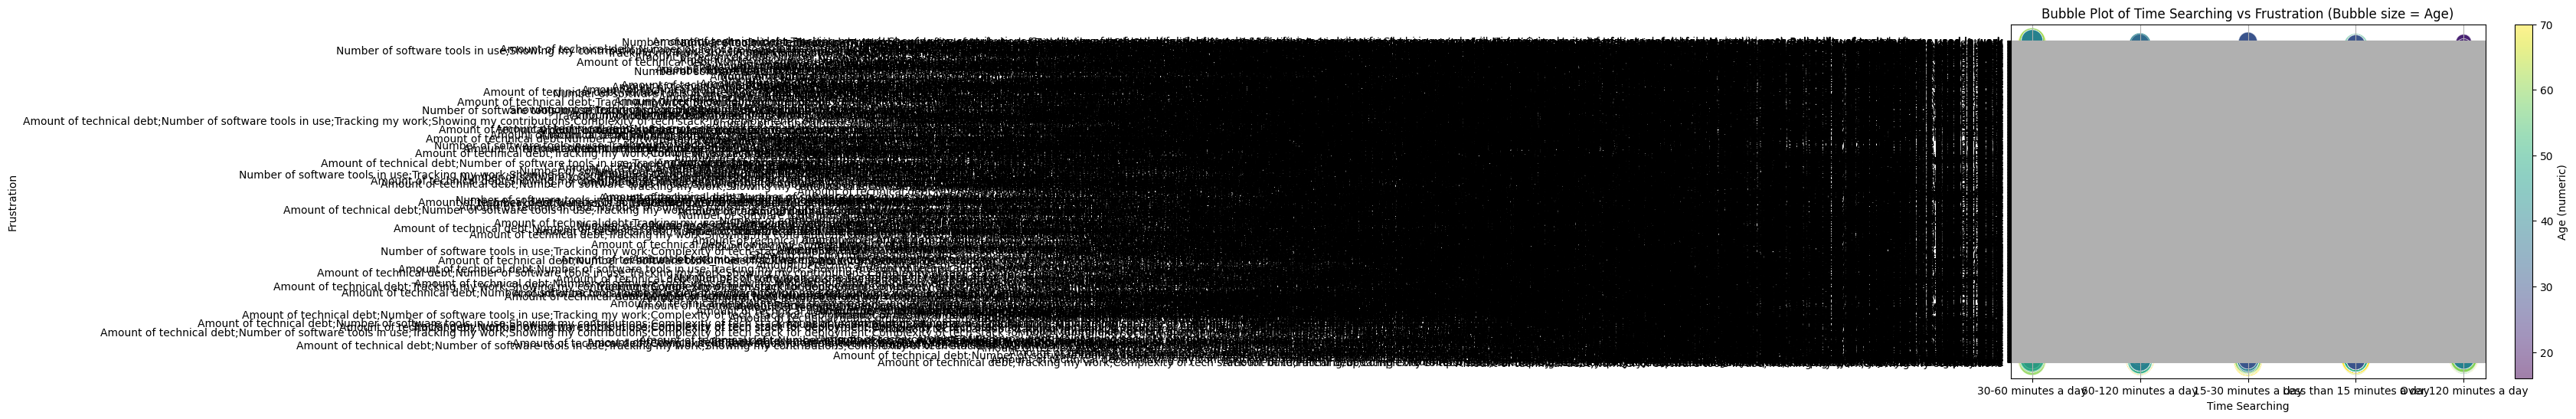

In [18]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data=df_bubble,
    x='TimeSearching',
    y='Frustration',
    s=df_bubble['AgeNumeric']*10,  # Scale bubble sizes (adjust multiplier as needed)
    alpha=0.5,
    c=df_bubble['AgeNumeric'],  # Optional: color by AgeNumeric for better visualization
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

plt.colorbar(scatter, label='Age (numeric)')
plt.title('Bubble Plot of Time Searching vs Frustration (Bubble size = Age)')
plt.xlabel('Time Searching')
plt.ylabel('Frustration')
plt.grid(True)
plt.show()

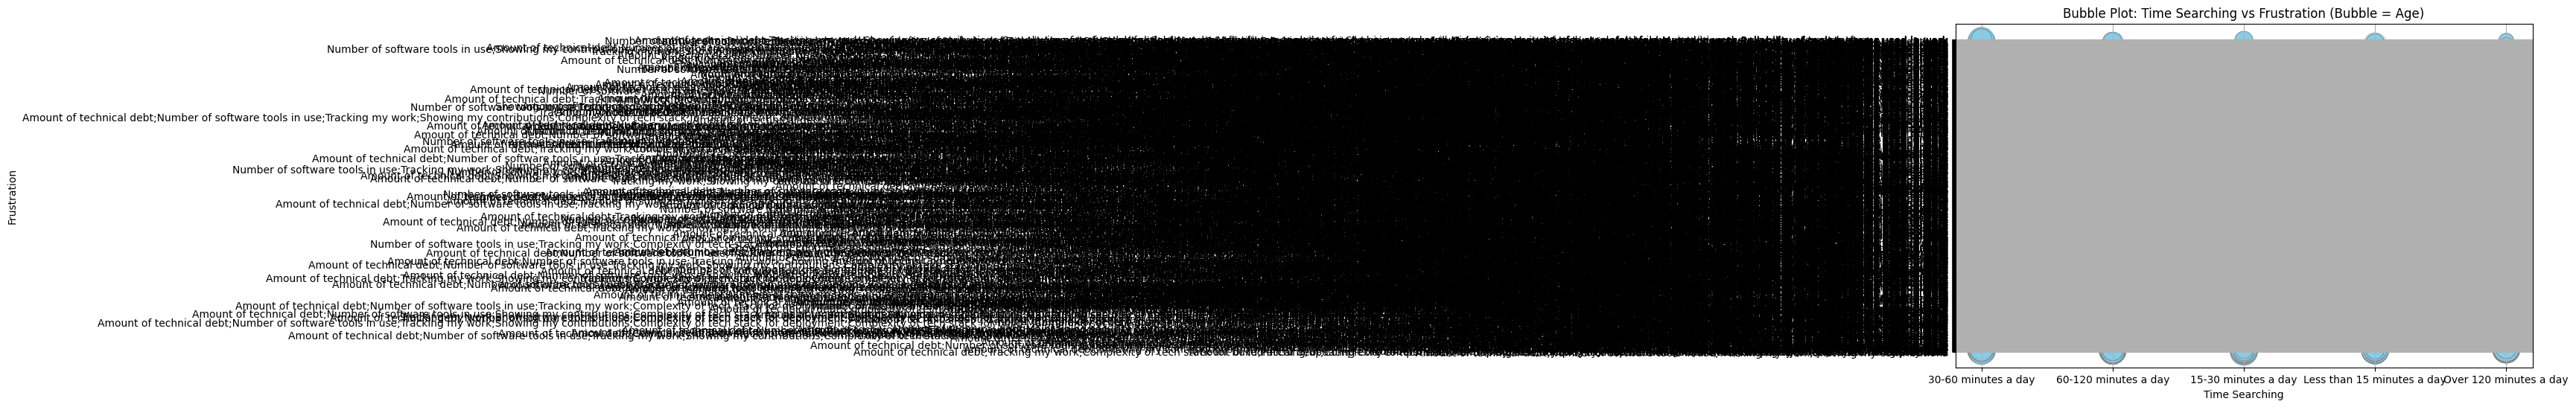

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df['TimeSearching'], 
    df['Frustration'], 
    s=df['AgeNumeric'] * 10,  # Scale bubble size
    alpha=0.5, 
    c='skyblue', 
    edgecolors='gray', 
    linewidth=0.5
)

plt.title('Bubble Plot: Time Searching vs Frustration (Bubble = Age)')
plt.xlabel('Time Searching')
plt.ylabel('Frustration')
plt.grid(True)
plt.show()

##### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.

In [20]:
# Split the multi-entry responses
db_series = df['DatabaseWantToWorkWith'].str.split(';')
db_flat = db_series.explode().str.strip()

# Count occurrences and get top 5
top_dbs = db_flat.value_counts().nlargest(5)

print(top_dbs)

DatabaseWantToWorkWith
PostgreSQL    108396
SQLite         45714
Redis          39974
MySQL          37449
MongoDB        34568
Name: count, dtype: int64


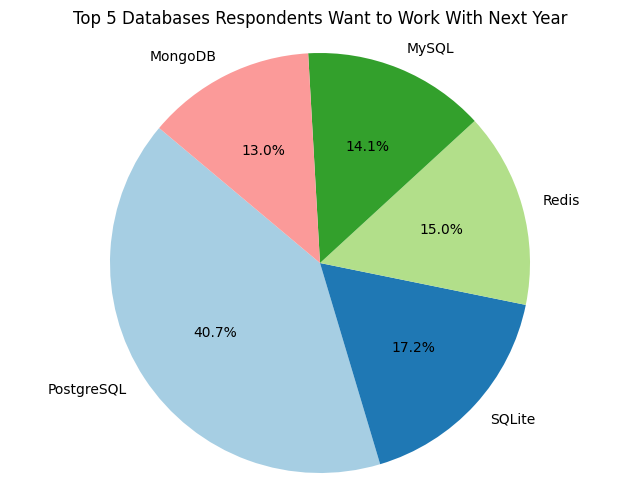

In [21]:
# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(top_dbs, labels=top_dbs.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Databases Respondents Want to Work With Next Year')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


**Stacked Charts**

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.

In [24]:
# Mapping time ranges to approximate minutes
time_mapping = {
    'Less than 15 minutes': 10,
    '15-30 minutes a day': 22,
    '30-60 minutes a day': 45,
    '1-2 hours a day': 90,
    '2-3 hours a day': 150,
    '3-4 hours a day': 210,
    '4+ hours a day': 300,
}

# Replace strings with numeric minutes
df['TimeSearchingNumeric'] = df['TimeSearching'].map(time_mapping)
df['TimeAnsweringNumeric'] = df['TimeAnswering'].map(time_mapping)


In [25]:
# Filter for age range 30–35
age_range_df = df[(df['AgeNumeric'] >= 30) & (df['AgeNumeric'] <= 35)]

# Group by AgeNumeric and compute median
median_times = age_range_df.groupby('AgeNumeric')[['TimeSearchingNumeric', 'TimeAnsweringNumeric']].median()

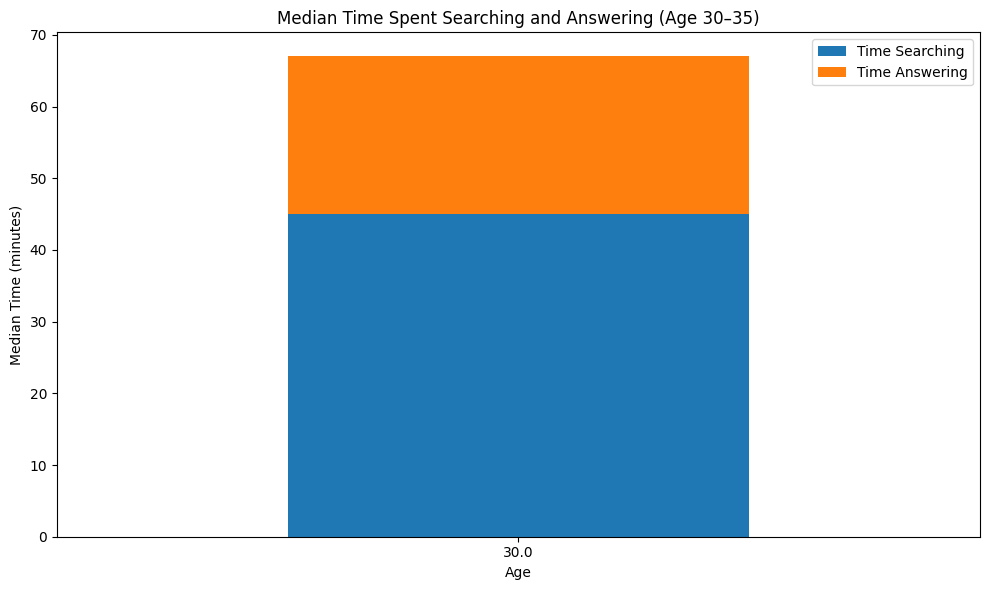

In [26]:
# Plot the stacked bar chart
median_times.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.title('Median Time Spent Searching and Answering (Age 30–35)')
plt.xlabel('Age')
plt.ylabel('Median Time (minutes)')
plt.legend(['Time Searching', 'Time Answering'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.

In [29]:
# Filter age range 45 to 60
age_range_df = df[(df['AgeNumeric'] >= 45) & (df['AgeNumeric'] <= 60)]

# Group by AgeNumeric and calculate median compensation
median_comp = age_range_df.groupby('AgeNumeric')['CompTotal'].median()

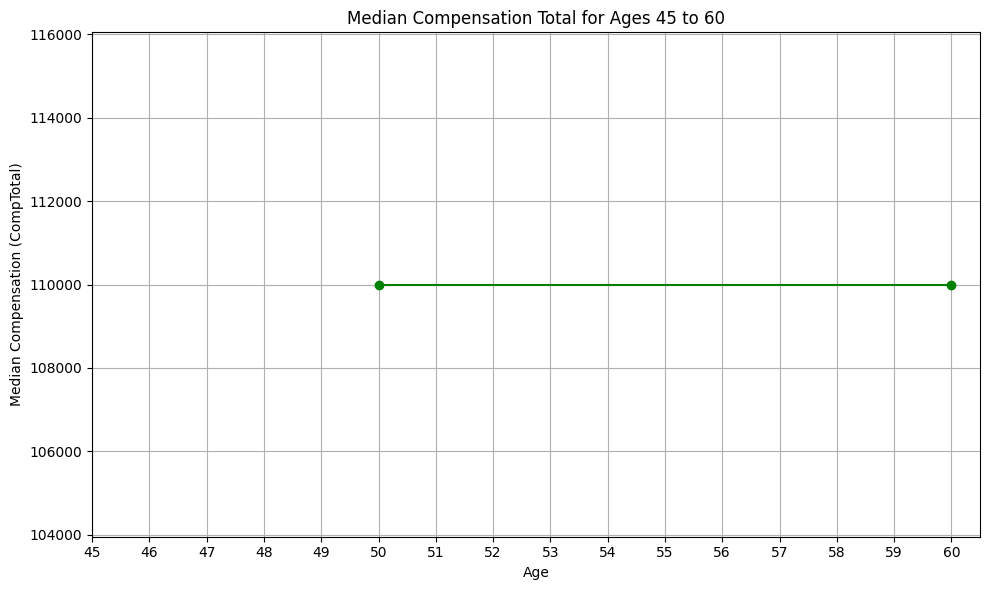

In [30]:
# Plot the line chart
plt.figure(figsize=(10, 6))
median_comp.plot(kind='line', marker='o', color='green')

plt.title('Median Compensation Total for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median Compensation (CompTotal)')
plt.grid(True)
plt.xticks(range(45, 61))
plt.tight_layout()
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.

In [31]:
# Count occurrences of each MainBranch category
mainbranch_counts = df['MainBranch'].value_counts()

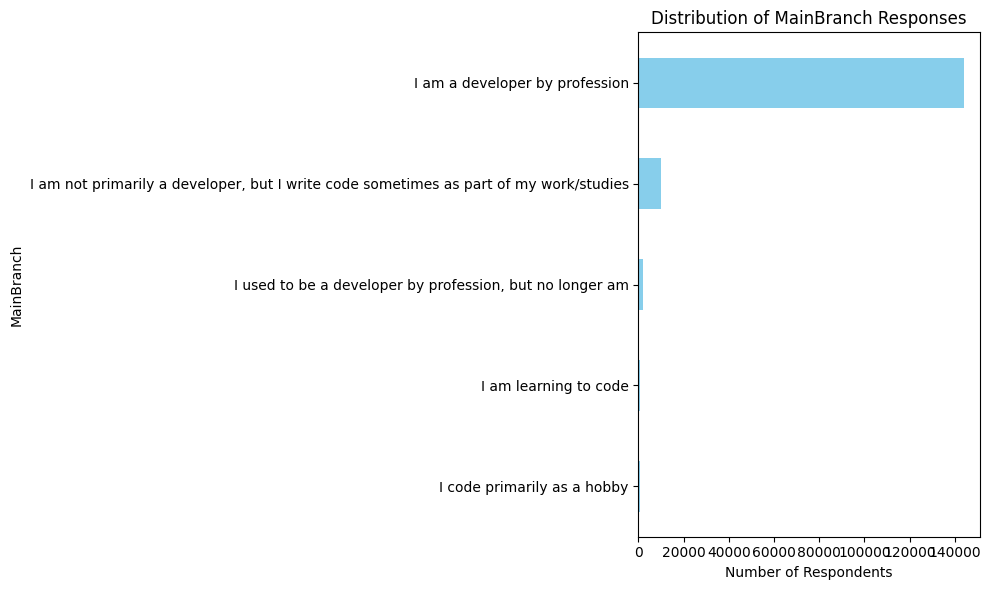

In [32]:
# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='skyblue')

plt.title('Distribution of MainBranch Responses')
plt.xlabel('Number of Respondents')
plt.ylabel('MainBranch')
plt.gca().invert_yaxis()  # Most frequent on top
plt.tight_layout()
plt.show()